In [1]:
from Manuel_BayesTRPL_Utilities import *
from Manuel_BayesTRPL_Plotting import *

Files ready...
1 1


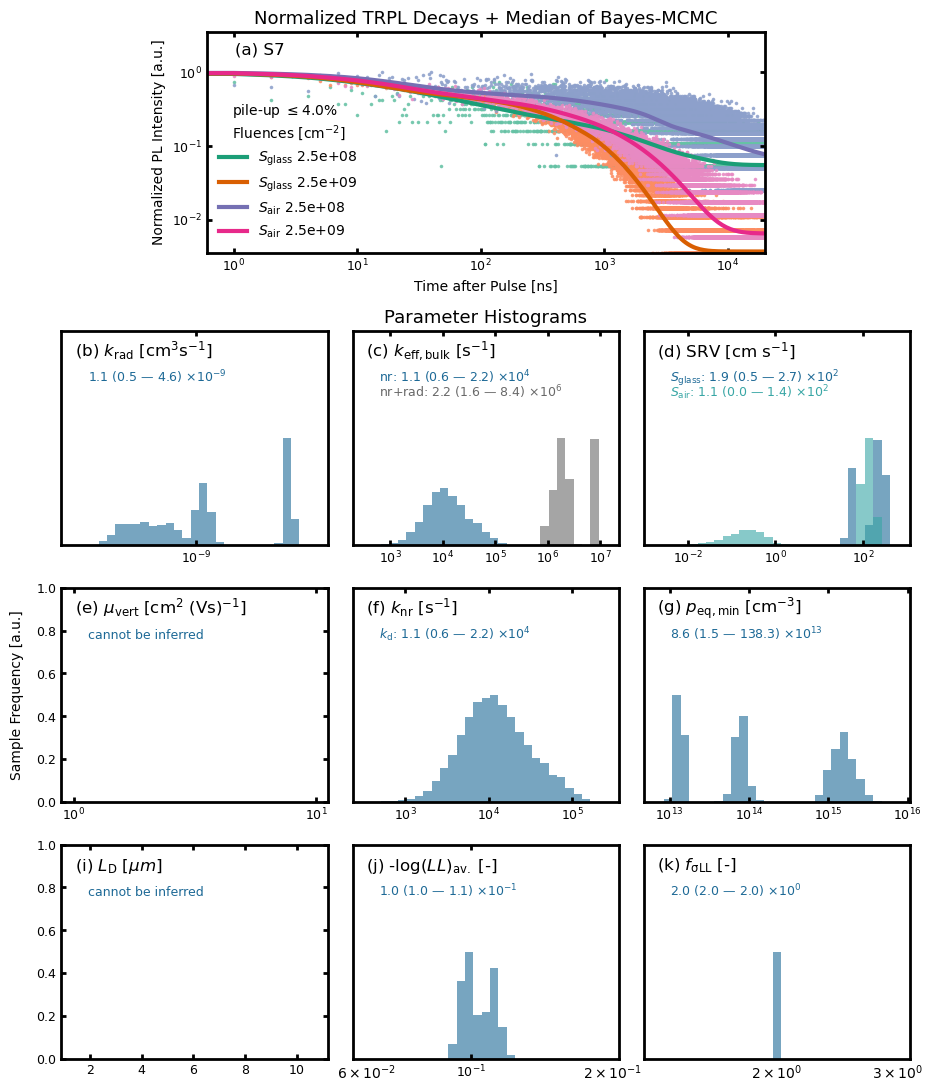

In [5]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\Collaborations\Amit\2D_passivations\2025_01_27_Amit_TRPL"
trace_file = r"S7_trace_2025-02-19_171821.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'glass'
side_2 = 'air'
SRV_display = 'topbot' # 'topbot' or 'upperlower'
scaling = 'log'

trace = az.from_netcdf(f'{folder}/{trace_file}')

filter = np.where(trace.posterior.mu_vert.values.ravel() > 0)

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, bckg_list, PN_on_off, diffusion_on_off, shallow_trap = Bayes_TRPL_Utils(folder, trace_file)
print(PN_on_off, diffusion_on_off)

df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display, bckg_list, PN_on_off, diffusion_on_off, shallow_trap, filter)

In [21]:
trace = az.from_netcdf(f'{folder}/{trace_file}')

P0s = trace.posterior.mu_vert.values[:,:].ravel()

limit_mobility = (800*1e-7)**2/(1e-9)/(1.380649e-23*292/1.6021766e-19)/4 #cm2 (Vs)-1
min_mobility = (800*1e-7)**2/(19953e-9)/(1.380649e-23*292/1.6021766e-19) * 5 #cm2 (Vs)-1

filter = [(P0s >= min_mobility) & (P0s <= limit_mobility)][0]

print(np.median(P0s[~filter]))

print(limit_mobility)
print(min_mobility)

#plt.hist(np.log10(P0s), bins=20)
#plt.show()

8.888273733152821e-05
63.5863993166525
0.06373617933809704


In [6]:
df_save.columns

Index(['k_rad(cm3s-1)', 'peq_min(cm-3)', 'k_deep(s-1)', 'k_nr_eff(s-1)',
       'k_bulk_eff(s-1)', 'S_1(cm s-1)', 'S_2(cm s-1)', 'S_lower(cm s-1)',
       'S_upper(cm s-1)', 'LL', 'sigma_LL_factor'],
      dtype='object')

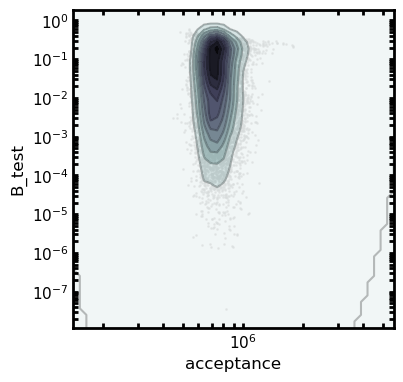

In [15]:
kd = df_save['mu_vert']
keff = df_save['k_nr_eff(s-1)']

corner_plot_single(kd, keff/kd, 'acceptance', 'B_test', ' ')